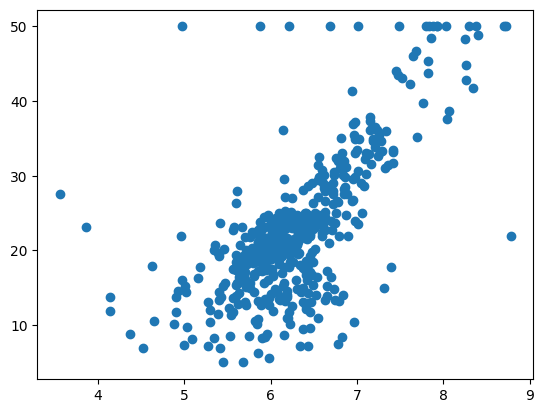

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data file
boston = pd.read_csv('BostonHousePrices.csv')

# Store the response in y and the feature in x
y = boston['Value'].to_numpy()
x = boston[['Rooms']].to_numpy()

# Create the training set and test set
train_y = y[:400]
train_x = x[:400]
test_x = x[400:]
test_y = y[400:]
# print(test_y)
# Plot the data using plt.scatter function
# ======== YOUR CODE HERE ========
plt.scatter(x,y)
# ================================

In [42]:
# Variables: x - the first array
#            y - the second array
# Description: calculate the mean squared error loss between two arrays
def mse(x, y):
    return np.mean((x-y)**2)

# Variables: theta -  linear regression parameter
#            X - features
#            y - responses
# Description: compute the cost function J, given theta and dataset
def cost_lin(theta, X, y):
# ======== YOUR CODE HERE ========
    m = y.shape[0]
    J = 1/(2*m) *(theta @ X.T - y) @ (theta @ X.T - y).T
    
# ================================
    return J


# Variables: theta -  linear regression parameter
#            X - features
#            y - responses
# Description: computes the partial derivative of the cost with respect to parameter theta.
def grad_lin(theta, X, y):

# ======== YOUR CODE HERE ========
    grad = 1/y.shape[0] *(theta @ X.T - y) @ X

# ================================
    return grad

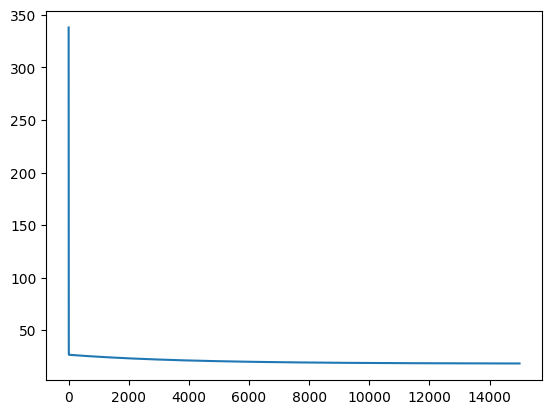

In [53]:
#Train Classifier
num_iter = 15000
alpha = 1*10**(-2)

# Add a column of ones to train_x
ones = np.ones((train_x.shape[0],1))
train_X = np.hstack((ones, train_x))

# Add a column of ones to test_x
ones = np.ones((test_x.shape[0],1))
test_X = np.hstack((ones, test_x))

# Initialize parameters
init_theta = np.zeros((1, train_X.shape[1]))

# ======== YOUR CODE HERE ========
optTheta = np.copy(init_theta)

costs = np.zeros(num_iter)
for i in range(num_iter):
    costs[i] = cost_lin(optTheta, train_X,train_y)
    optTheta = optTheta - alpha* grad_lin(optTheta,train_X,train_y)
# ================================
plt.plot(np.arange(num_iter), costs)


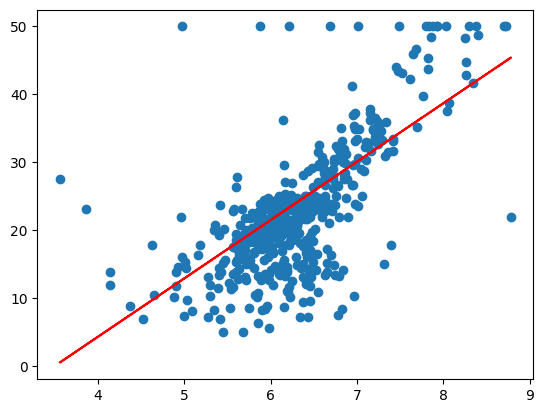

In [58]:
ones = np.ones((x.shape[0],1))
tempx = np.hstack((ones, x))
Yhat = (optTheta @ tempx.T).T
plt.scatter(x,y)
plt.plot(x, Yhat, color = 'r')